In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    RocCurveDisplay, precision_score, recall_score, accuracy_score, f1_score
)

In [49]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [3]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [4]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [5]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 991346
Number of columns: 24


In [6]:
missing_counts = df.isnull().sum()
print(missing_counts)

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64


In [7]:
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

In [8]:
print(df['sex'].unique())
print(df['DRK_YN'].unique())

df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['DRK_YN'] = df['DRK_YN'].map({'Y': 1, 'N': 0})

df['sex'] = df['sex'].astype(float)
df['DRK_YN'] = df['DRK_YN'].astype(float)

print(df.dtypes[['sex', 'DRK_YN']])

['Male' 'Female']
['Y' 'N']
sex       float64
DRK_YN    float64
dtype: object


In [9]:


df['age'] = df['age'].astype(float)
df['height'] = df['height'].astype(float)
df['weight'] = df['weight'].astype(float)


In [10]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1.0,35.0,170.0,75.0,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0
1,1.0,30.0,180.0,80.0,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0
2,1.0,40.0,165.0,75.0,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0
3,1.0,50.0,175.0,80.0,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0
4,1.0,50.0,165.0,60.0,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0


In [11]:
df.dtypes

sex                 float64
age                 float64
height              float64
weight              float64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN              float64
dtype: object

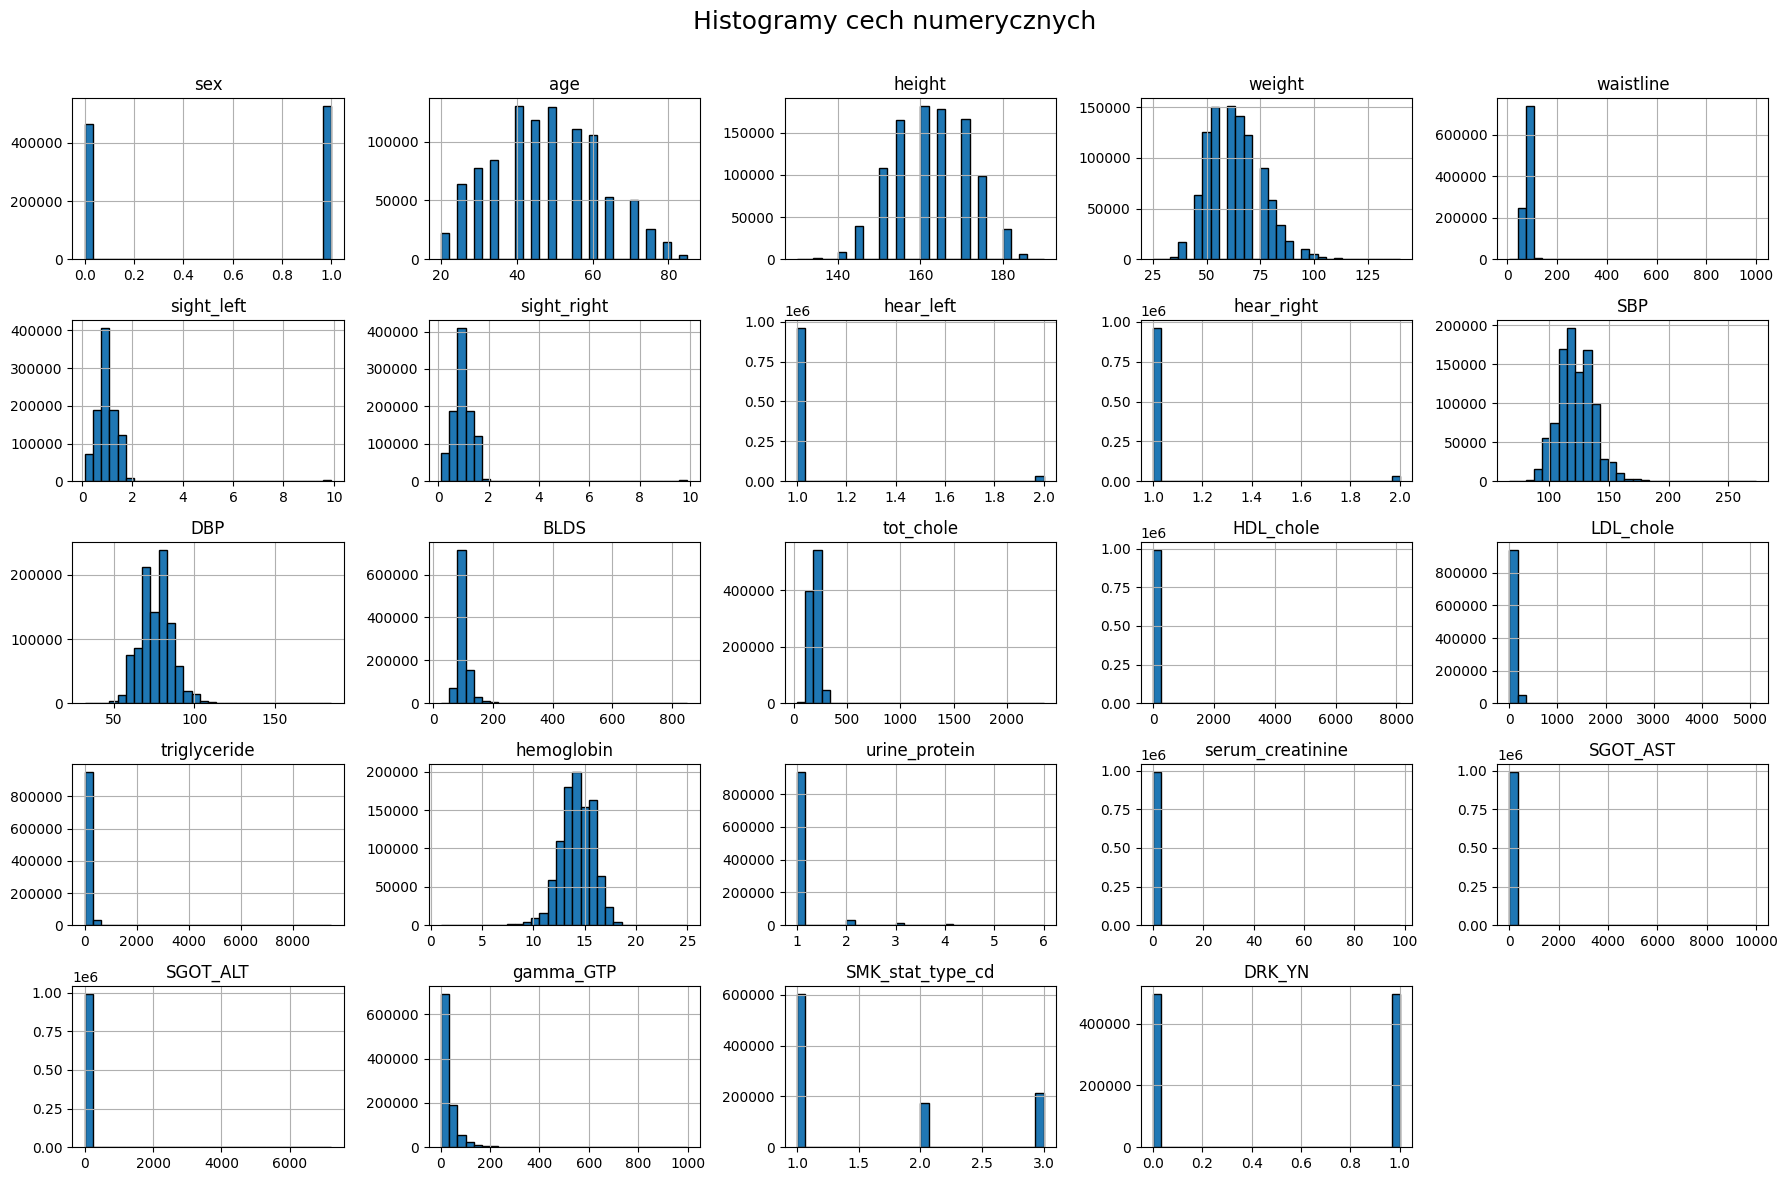

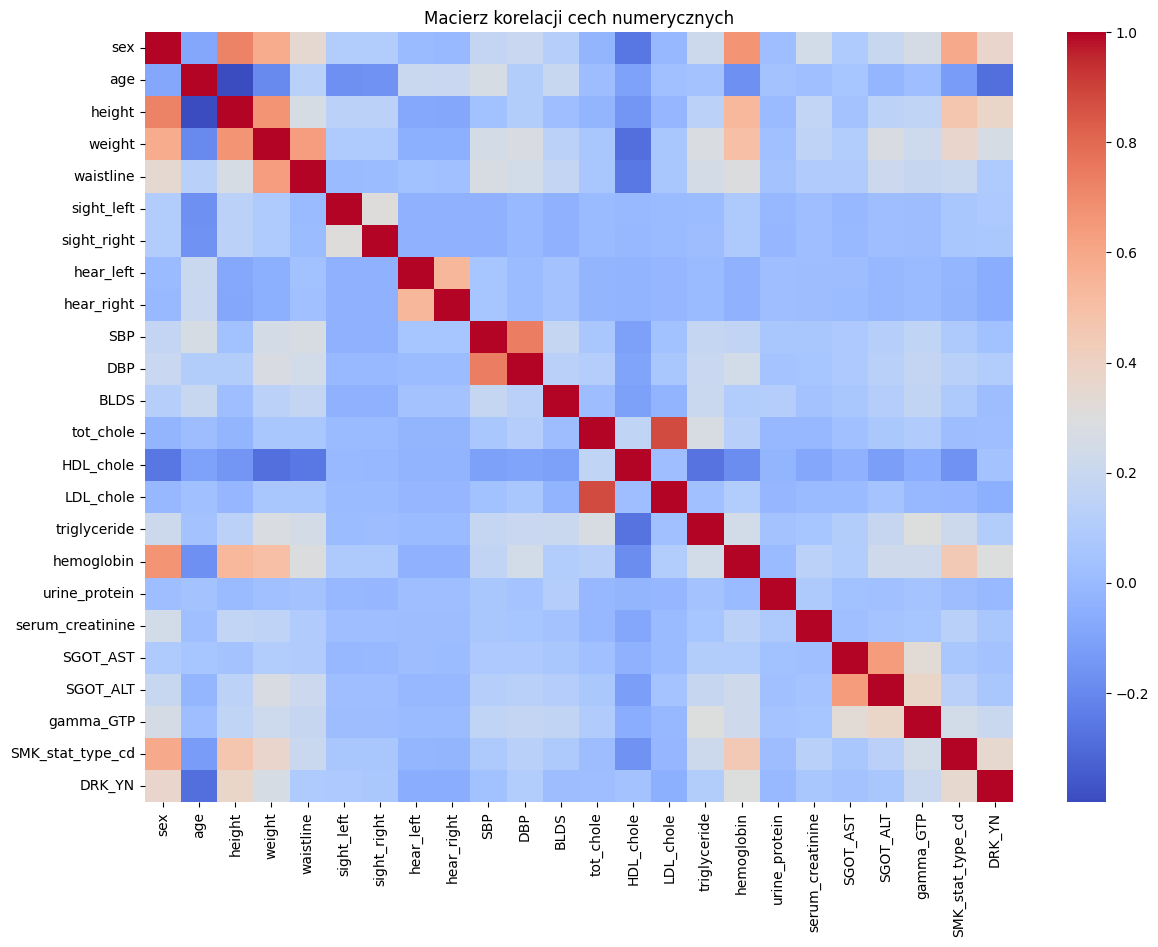

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogramy wszystkich cech numerycznych
df.hist(bins=30, figsize=(18, 12), edgecolor='black')
plt.suptitle("Histogramy cech numerycznych", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# 3. Heatmapa korelacji
plt.figure(figsize=(14, 10))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Macierz korelacji cech numerycznych")
plt.show()



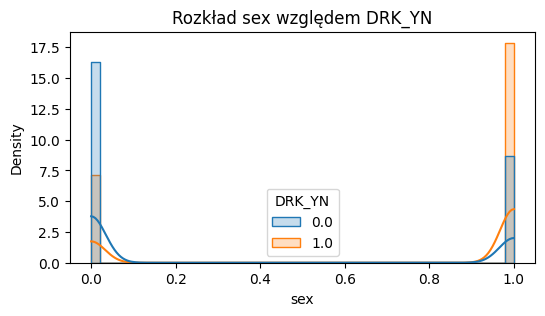

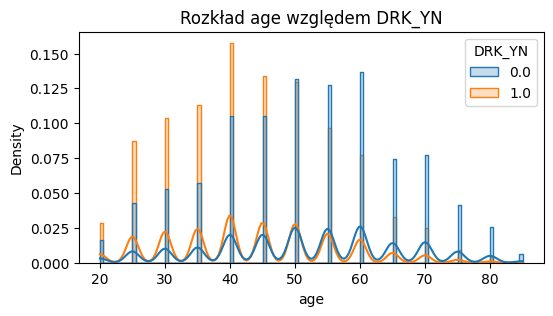

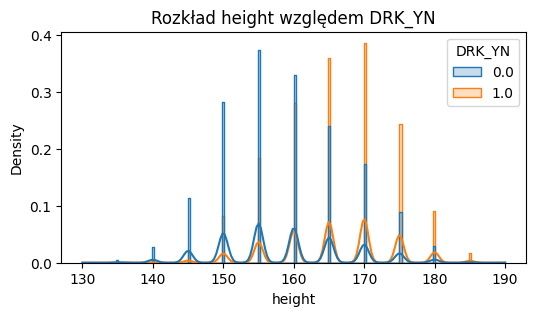

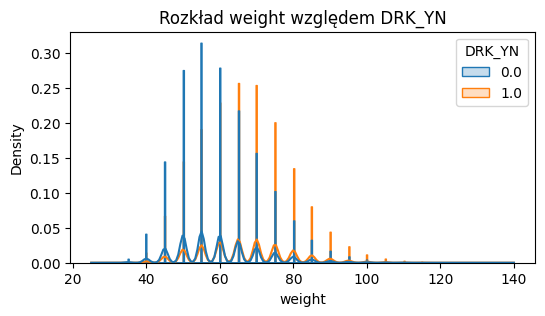

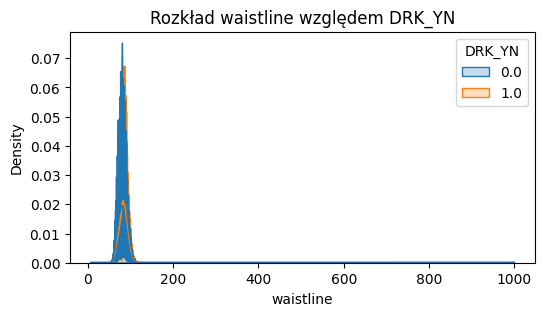

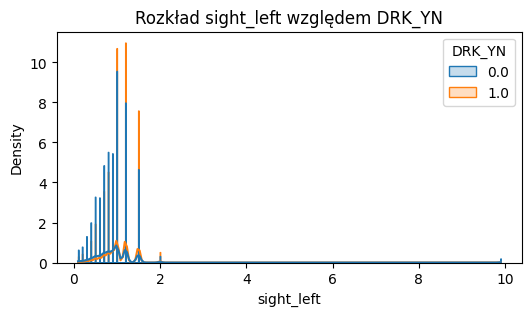

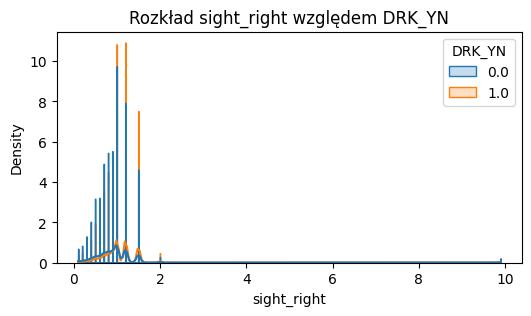

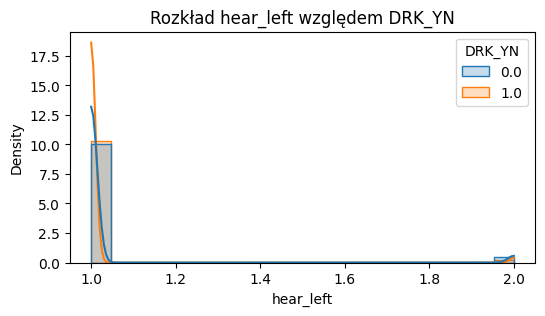

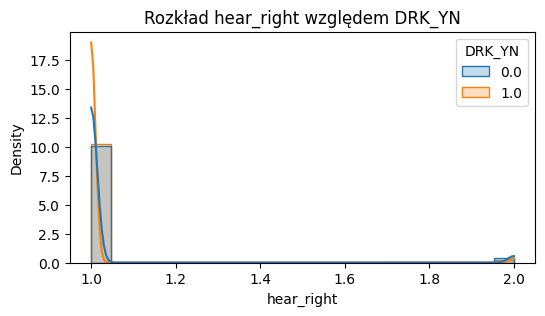

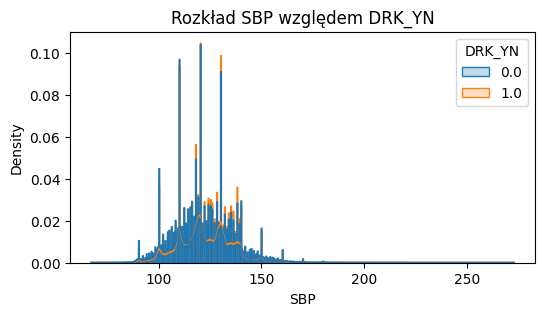

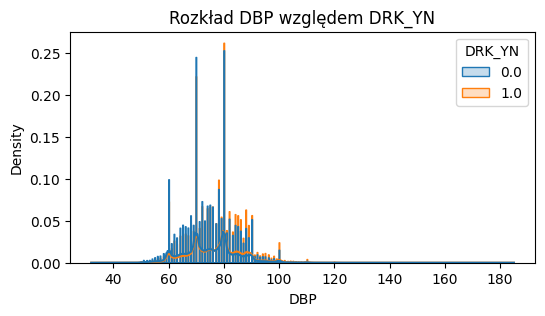

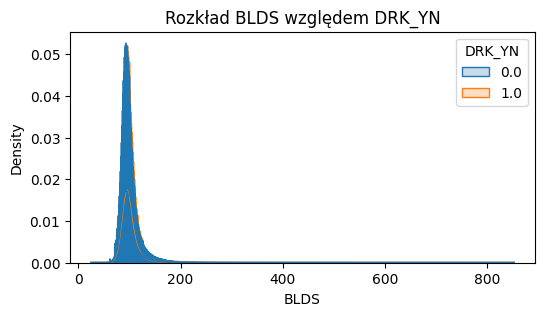

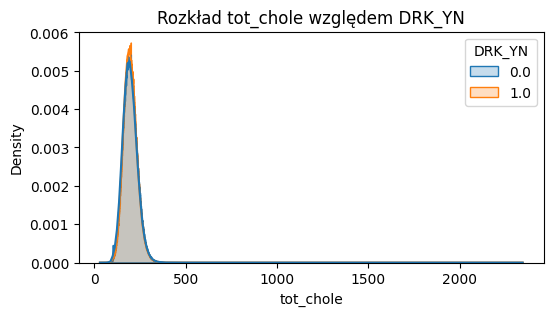

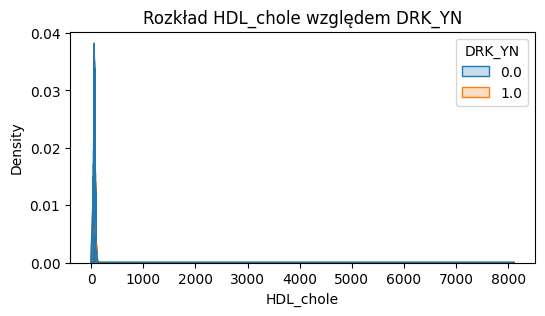

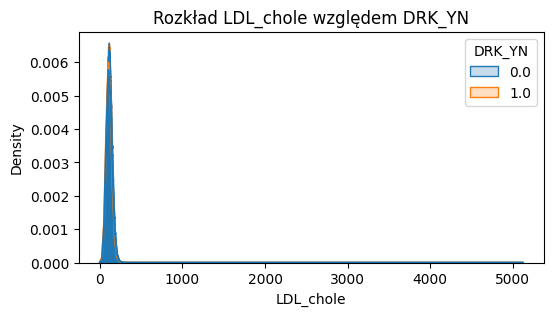

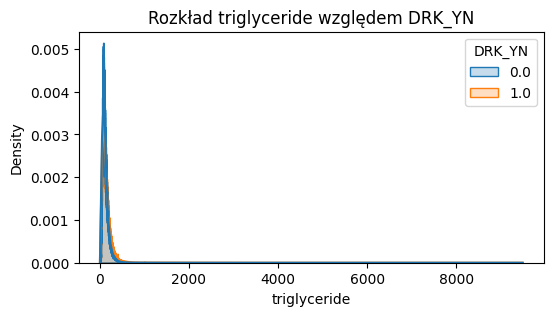

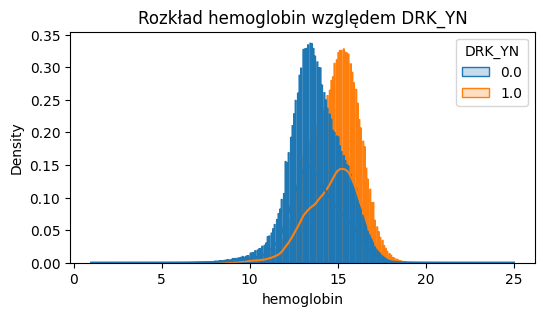

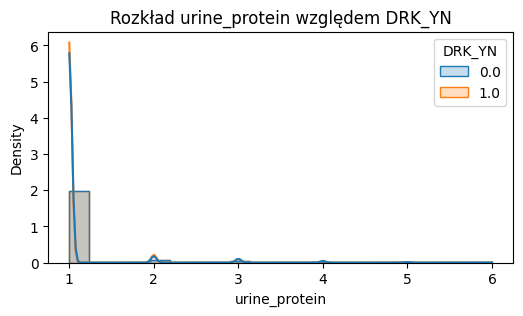

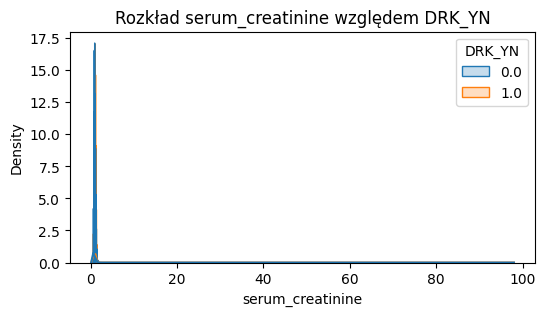

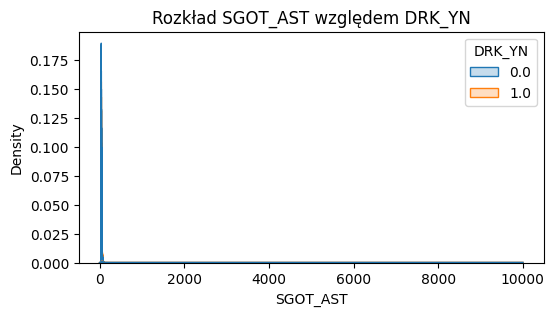

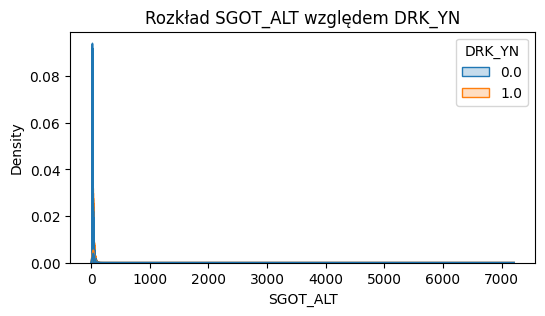

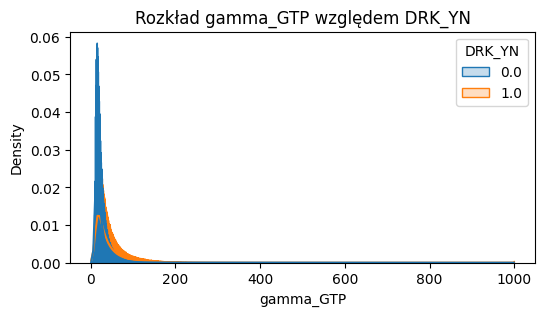

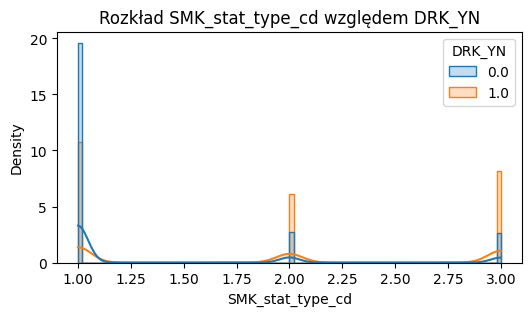

In [ ]:
#  Histogramy cech numerycznych względem DRK_YN
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    if col != 'DRK_YN':
        plt.figure(figsize=(6, 3))
        sns.histplot(data=df, x=col, hue='DRK_YN', kde=True, element="step", stat="density")
        plt.title(f"Rozkład {col} względem DRK_YN")
        plt.show()

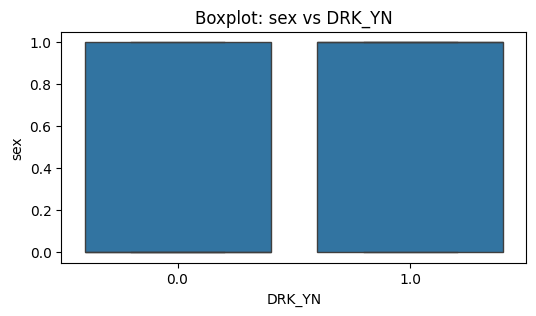

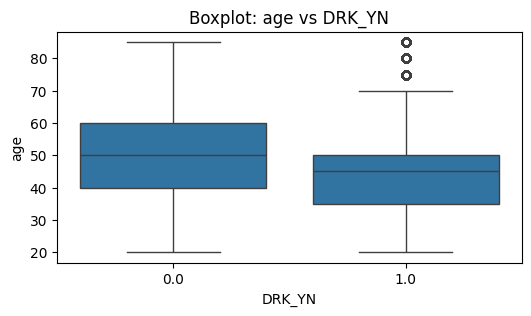

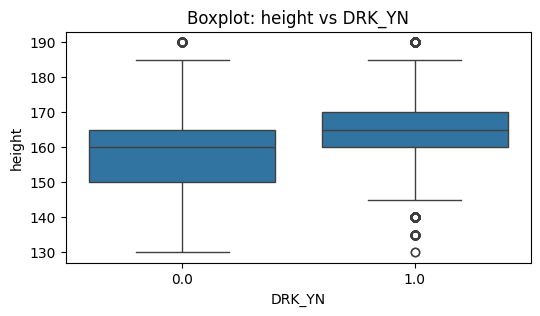

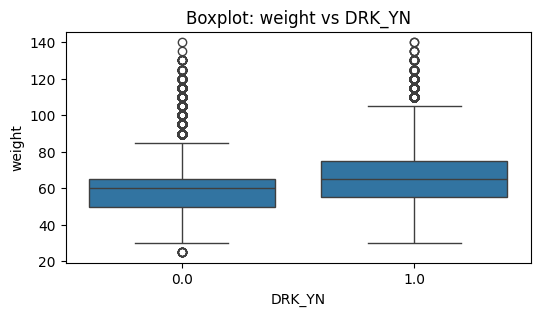

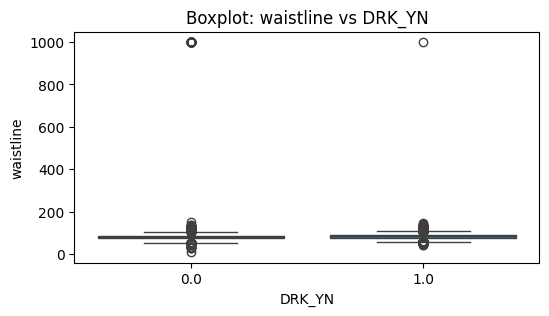

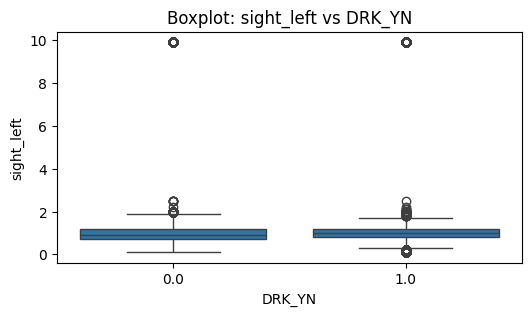

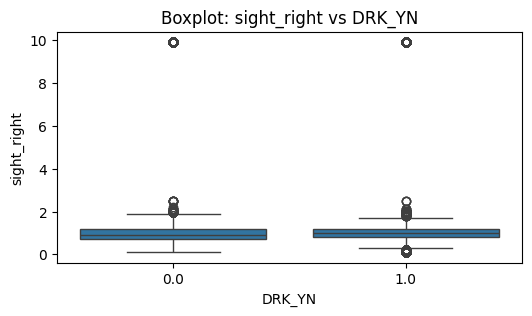

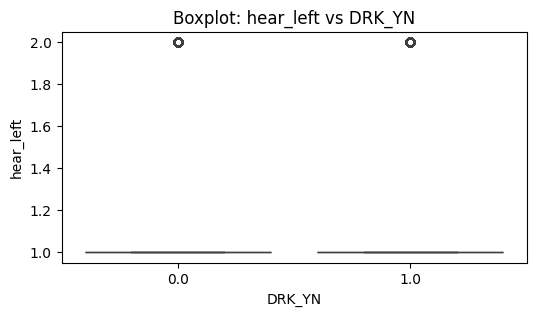

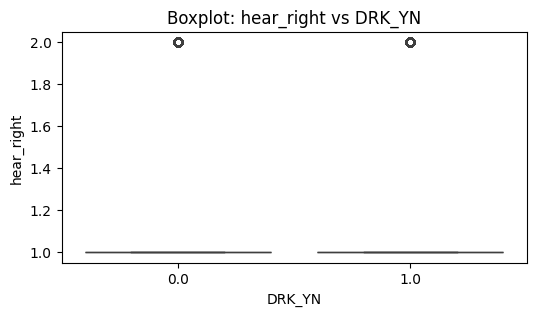

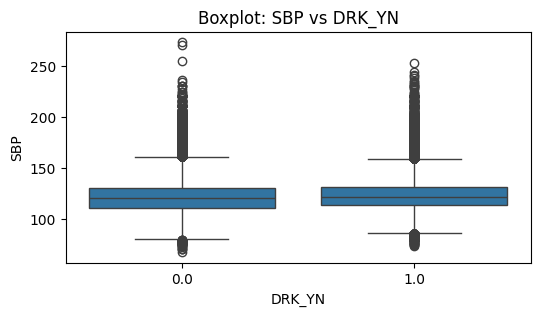

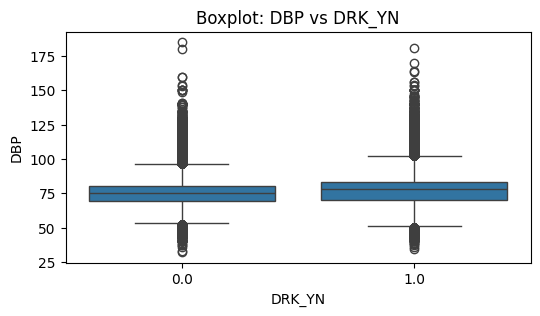

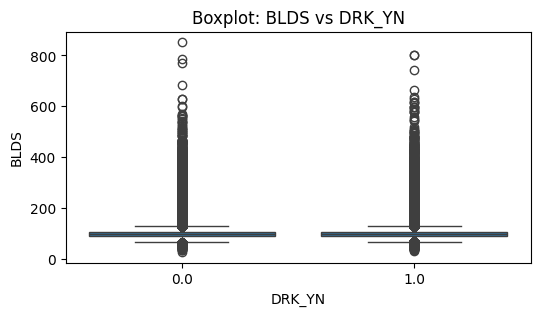

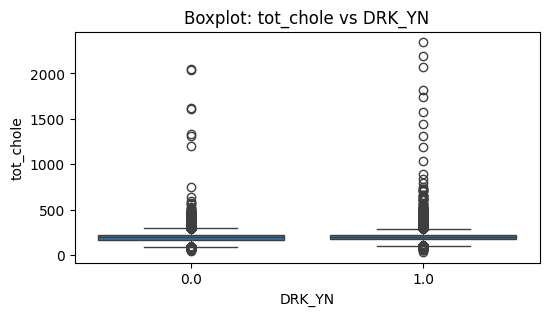

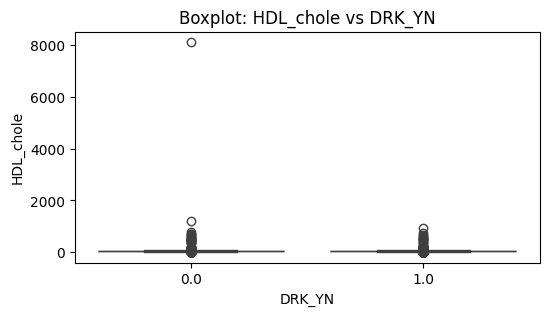

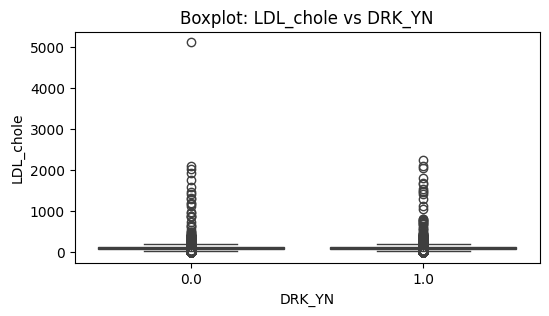

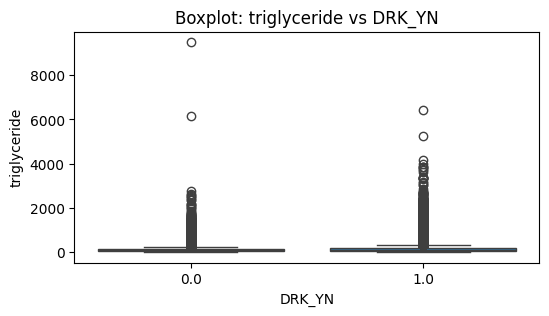

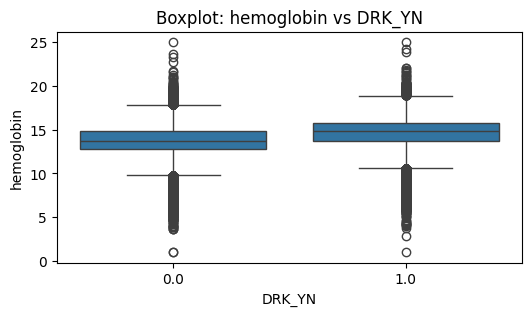

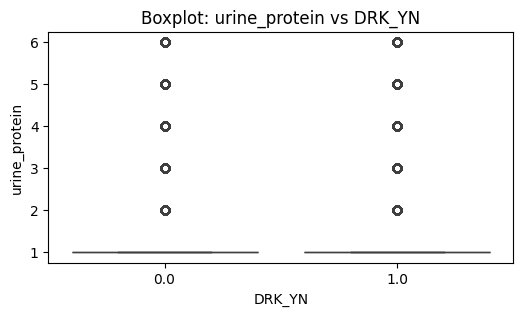

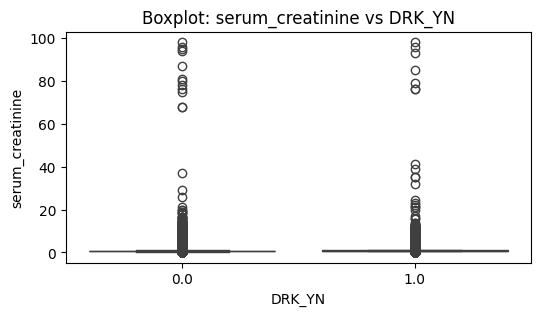

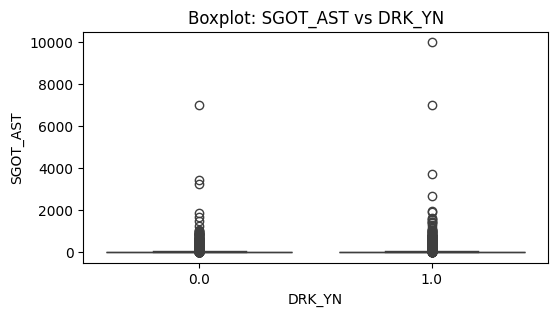

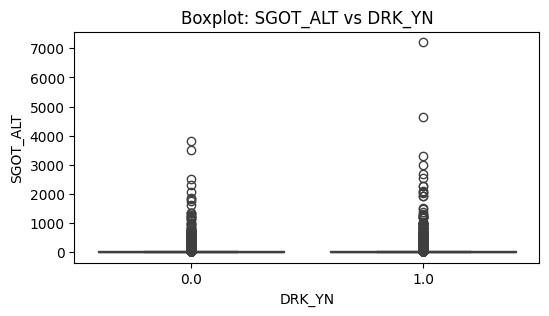

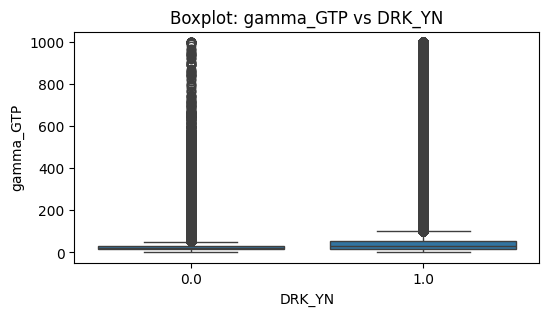

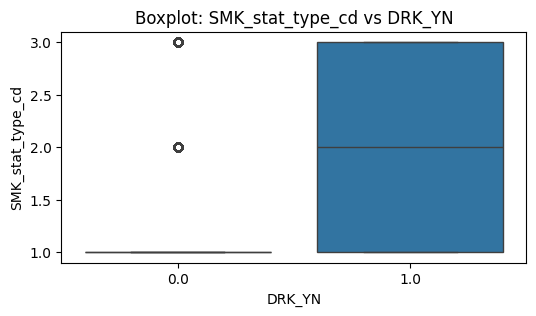

In [ ]:
 
for col in num_cols:
    if col != 'DRK_YN':
        plt.figure(figsize=(6, 3))
        sns.boxplot(x='DRK_YN', y=col, data=df)
        plt.title(f"Boxplot: {col} vs DRK_YN")
        plt.show()

In [15]:

min_max_summary = df.describe().T[['min', 'max']]
print("Wartości minimalne i maksymalne dla cech numerycznych:")
min_max_summary

Wartości minimalne i maksymalne dla cech numerycznych:


,min,max
sex,0.0,1.0
age,20.0,85.0
height,130.0,190.0
weight,25.0,140.0
waistline,8.0,999.0
sight_left,0.1,9.9
sight_right,0.1,9.9
hear_left,1.0,2.0
hear_right,1.0,2.0
SBP,67.0,273.0


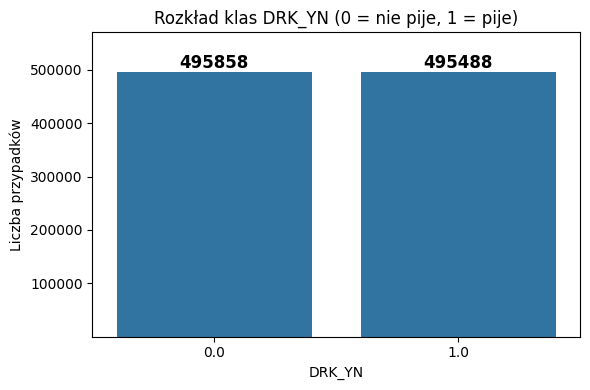

In [ ]:


plt.figure(figsize=(6, 4))
ax = sns.countplot(x='DRK_YN', data=df)
plt.title("Rozkład klas DRK_YN (0 = nie pije, 1 = pije)")
plt.xlabel("DRK_YN")
plt.ylim(55, max([p.get_height() for p in ax.patches]) * 1.15)
plt.ylabel("Liczba przypadków")


for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count), (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

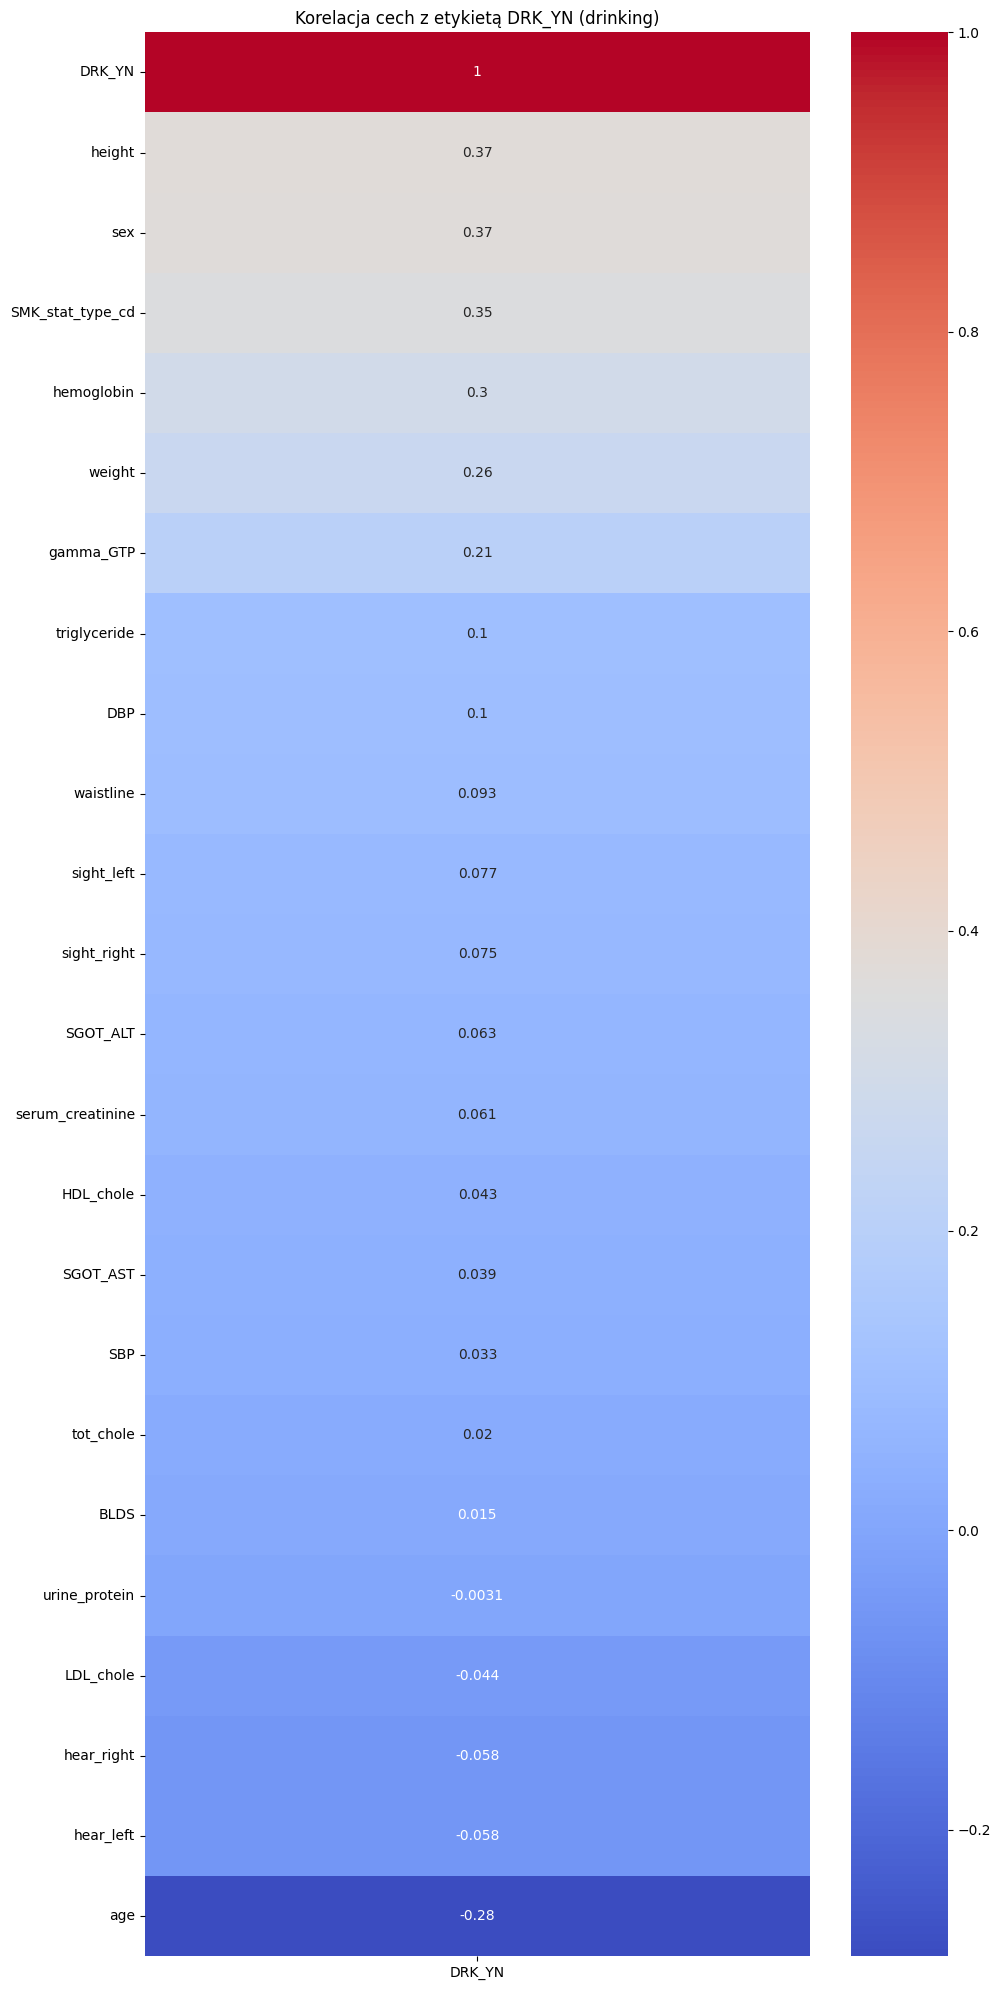

(DRK_YN              1.000000
 height              0.374566
 sex                 0.368726
 SMK_stat_type_cd    0.350784
 hemoglobin          0.299341
 weight              0.264282
 gamma_GTP           0.205094
 triglyceride        0.104398
 DBP                 0.100876
 waistline           0.092993
 sight_left          0.077379
 sight_right         0.074806
 SGOT_ALT            0.062908
 serum_creatinine    0.060798
 HDL_chole           0.042514
 SGOT_AST            0.039382
 Name: DRK_YN, dtype: float64,
 waistline           0.092993
 sight_left          0.077379
 sight_right         0.074806
 SGOT_ALT            0.062908
 serum_creatinine    0.060798
 HDL_chole           0.042514
 SGOT_AST            0.039382
 SBP                 0.033149
 tot_chole           0.019720
 BLDS                0.014713
 urine_protein      -0.003125
 LDL_chole          -0.043693
 hear_right         -0.058230
 hear_left          -0.058337
 age                -0.284587
 Name: DRK_YN, dtype: float64)

In [ ]:

correlation_matrix = df.corr()

drinking_correlation = correlation_matrix['DRK_YN'].sort_values(ascending=False)


top_positive_corr_drk = drinking_correlation.head(16)  
top_negative_corr_drk = drinking_correlation.tail(15)

plt.figure(figsize=(10, 20))
sns.heatmap(drinking_correlation.to_frame(), cmap='coolwarm', annot=True, cbar=True)
plt.title("Korelacja cech z etykietą DRK_YN (drinking)")
plt.tight_layout()
plt.show()

top_positive_corr_drk, top_negative_corr_drk

In [ ]:

X = df.drop(columns=['DRK_YN'])
y = df['DRK_YN']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
print(X_train_scaled)

[[ 0.94012537  1.22628353  0.83624416 ... -0.40295843  0.01772872
   0.47908089]
 [ 0.94012537  0.16831744  0.83624416 ...  0.08369489 -0.16120356
   1.70105227]
 [-1.06368792 -0.53699329  0.29766685 ... -0.32808869 -0.39977993
  -0.74289048]
 ...
 [ 0.94012537 -0.53699329  1.37482147 ... -0.17834921  0.95215283
   1.70105227]
 [ 0.94012537  0.16831744 -0.24091045 ... -0.32808869  0.1370169
   0.47908089]
 [-1.06368792 -1.24230402 -0.77948776 ... -0.29065382 -0.39977993
  -0.74289048]]


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [ ]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_proba = rf.predict_proba(X_test_scaled)[:, 1]

print("Random Forest:")
print(classification_report(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_proba))
print("Macierz pomyłek:\n", confusion_matrix(y_test, rf_pred))


Random Forest:
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73     99172
         1.0       0.73      0.74      0.73     99098

    accuracy                           0.73    198270
   macro avg       0.73      0.73      0.73    198270
weighted avg       0.73      0.73      0.73    198270

ROC AUC: 0.8150116709721649
Macierz pomyłek:
 [[72662 26510]
 [26149 72949]]


In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)
xgb_proba = xgb.predict_proba(X_test_scaled)[:, 1]

print("\nXGBoost:")
print(classification_report(y_test, xgb_pred))
print("ROC AUC:", roc_auc_score(y_test, xgb_proba))
print("Macierz pomyłek:\n", confusion_matrix(y_test, xgb_pred))

/Users/franciszeklasinski/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [22:07:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost:
              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74     99172
         1.0       0.74      0.74      0.74     99098

    accuracy                           0.74    198270
   macro avg       0.74      0.74      0.74    198270
weighted avg       0.74      0.74      0.74    198270

ROC AUC: 0.822926750810888
Macierz pomyłek:
 [[72910 26262]
 [25462 73636]]


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_scaled, y_train)
lgbm_pred = lgbm.predict(X_test_scaled)
lgbm_proba = lgbm.predict_proba(X_test_scaled)[:, 1]

print("\nLightGBM:")
print(classification_report(y_test, lgbm_pred))
print("ROC AUC:", roc_auc_score(y_test, lgbm_proba))
print("Macierz pomyłek:\n", confusion_matrix(y_test, lgbm_pred))


[LightGBM] [Info] Number of positive: 396390, number of negative: 396686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2756
[LightGBM] [Info] Number of data points in the train set: 793076, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499813 -> initscore=-0.000746
[LightGBM] [Info] Start training from score -0.000746


/Users/franciszeklasinski/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/franciszeklasinski/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



LightGBM:
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74     99172
         1.0       0.74      0.75      0.74     99098

    accuracy                           0.74    198270
   macro avg       0.74      0.74      0.74    198270
weighted avg       0.74      0.74      0.74    198270

ROC AUC: 0.8229768632127656
Macierz pomyłek:
 [[72638 26534]
 [24960 74138]]


In [33]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)
dt_proba = dt.predict_proba(X_test_scaled)[:, 1]

print("\nDecision Tree:")
print(classification_report(y_test, dt_pred))
print("ROC AUC:", roc_auc_score(y_test, dt_proba))
print("Macierz pomyłek:\n", confusion_matrix(y_test, dt_pred))


Decision Tree:
              precision    recall  f1-score   support

         0.0       0.65      0.64      0.65     99172
         1.0       0.65      0.65      0.65     99098

    accuracy                           0.65    198270
   macro avg       0.65      0.65      0.65    198270
weighted avg       0.65      0.65      0.65    198270

ROC AUC: 0.646835914187084
Macierz pomyłek:
 [[63938 35234]
 [34788 64310]]


In [34]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
logreg_pred = logreg.predict(X_test_scaled)
logreg_proba = logreg.predict_proba(X_test_scaled)[:, 1]

print("\nLogistic Regression:")
print(classification_report(y_test, logreg_pred))
print("ROC AUC:", roc_auc_score(y_test, logreg_proba))
print("Macierz pomyłek:\n", confusion_matrix(y_test, logreg_pred))


/Users/franciszeklasinski/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/franciszeklasinski/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/franciszeklasinski/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/franciszeklasinski/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/franciszeklasinski/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountere


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.72      0.73      0.73     99172
         1.0       0.73      0.72      0.72     99098

    accuracy                           0.73    198270
   macro avg       0.73      0.73      0.73    198270
weighted avg       0.73      0.73      0.73    198270

ROC AUC: 0.8042269036645606
Macierz pomyłek:
 [[72868 26304]
 [27808 71290]]


/Users/franciszeklasinski/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/franciszeklasinski/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/franciszeklasinski/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/franciszeklasinski/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/franciszeklasinski/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/franciszeklasinski/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Random Forest,0.734408,0.733458,0.736130,0.734792,0.815012
1,XGBoost,0.739123,0.737112,0.743062,0.740075,0.822927
2,LightGBM,0.740283,0.736431,0.748128,0.742234,0.822977
3,Decision Tree,0.646835,0.646046,0.648954,0.647497,0.646836
4,Logistic Regression,0.727079,0.730475,0.719389,0.724890,0.804227


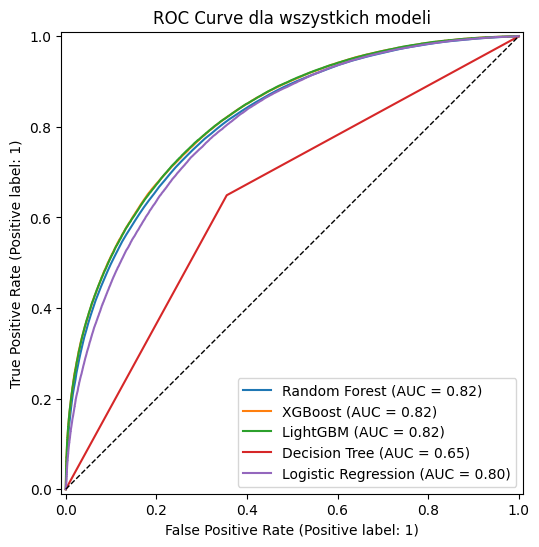

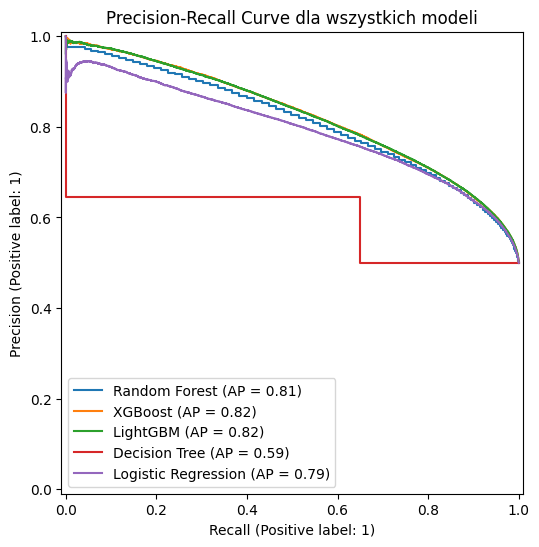

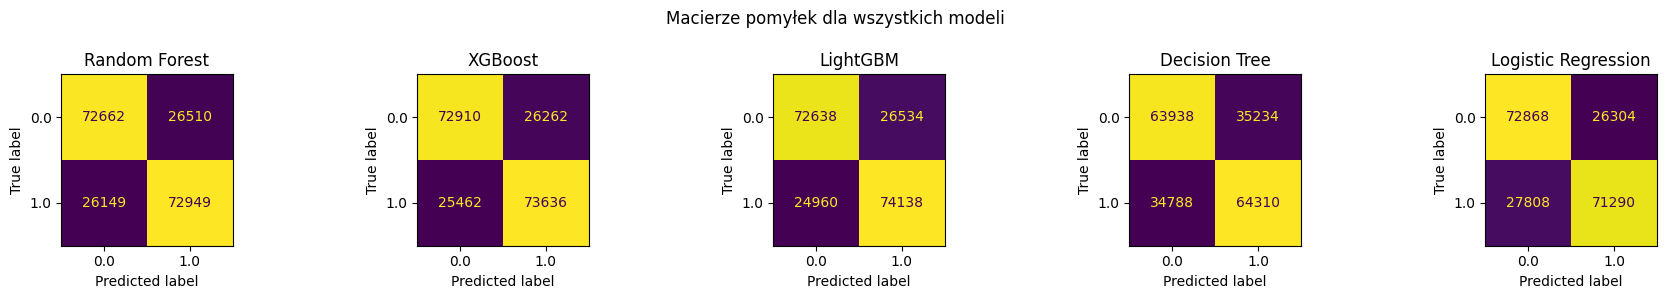

In [ ]:


from sklearn.metrics import ConfusionMatrixDisplay
model_names = [
    "Random Forest", "XGBoost", "LightGBM", "Decision Tree", "Logistic Regression"
]
y_preds = [rf_pred, xgb_pred, lgbm_pred, dt_pred, logreg_pred]
y_probas = [rf_proba, xgb_proba, lgbm_proba, dt_proba, logreg_proba]
models = [rf, xgb, lgbm, dt, logreg]  

results = []
for name, y_pred, y_proba in zip(model_names, y_preds, y_probas):
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })
results_df = pd.DataFrame(results)
display(results_df)


plt.figure(figsize=(8, 6))
for name, model, proba in zip(model_names, models, y_probas):
    RocCurveDisplay.from_predictions(y_test, proba, name=name, ax=plt.gca())
plt.title("ROC Curve dla wszystkich modeli")
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
for name, proba in zip(model_names, y_probas):
    PrecisionRecallDisplay.from_predictions(y_test, proba, name=name, ax=plt.gca())
plt.title("Precision-Recall Curve dla wszystkich modeli")
plt.legend()
plt.show()


fig, axes = plt.subplots(1, len(model_names), figsize=(18, 3))
for ax, name, y_pred in zip(axes, model_names, y_preds):
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, colorbar=False)
    ax.set_title(name)
plt.suptitle("Macierze pomyłek dla wszystkich modeli")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

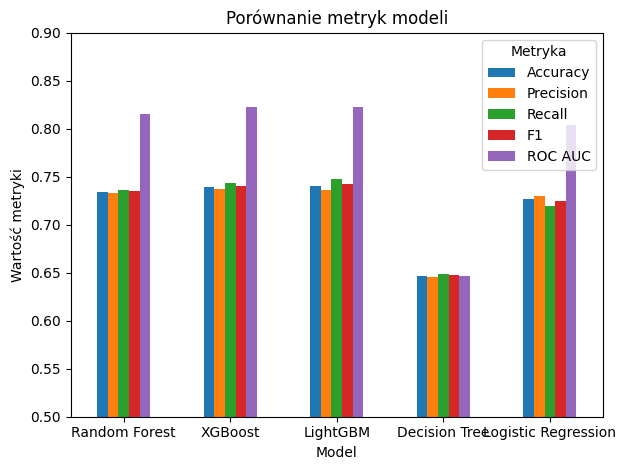

In [ ]:

metrics = ["Accuracy", "Precision", "Recall", "F1", "ROC AUC"]
results_df_plot = results_df.set_index("Model")[metrics]

plt.figure(figsize=(12, 6))
results_df_plot.plot(kind="bar", rot=0)
plt.title("Porównanie metryk modeli")
plt.ylabel("Wartość metryki")
plt.ylim(0.5, 0.9)
plt.legend(title="Metryka")
plt.tight_layout()
plt.show()

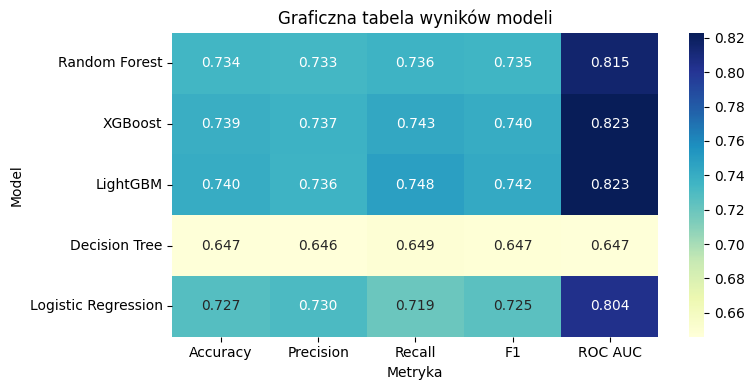

In [ ]:


import seaborn as sns

plt.figure(figsize=(8, 4))
sns.heatmap(results_df_plot, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True)
plt.title("Graficzna tabela wyników modeli")
plt.ylabel("Model")
plt.xlabel("Metryka")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

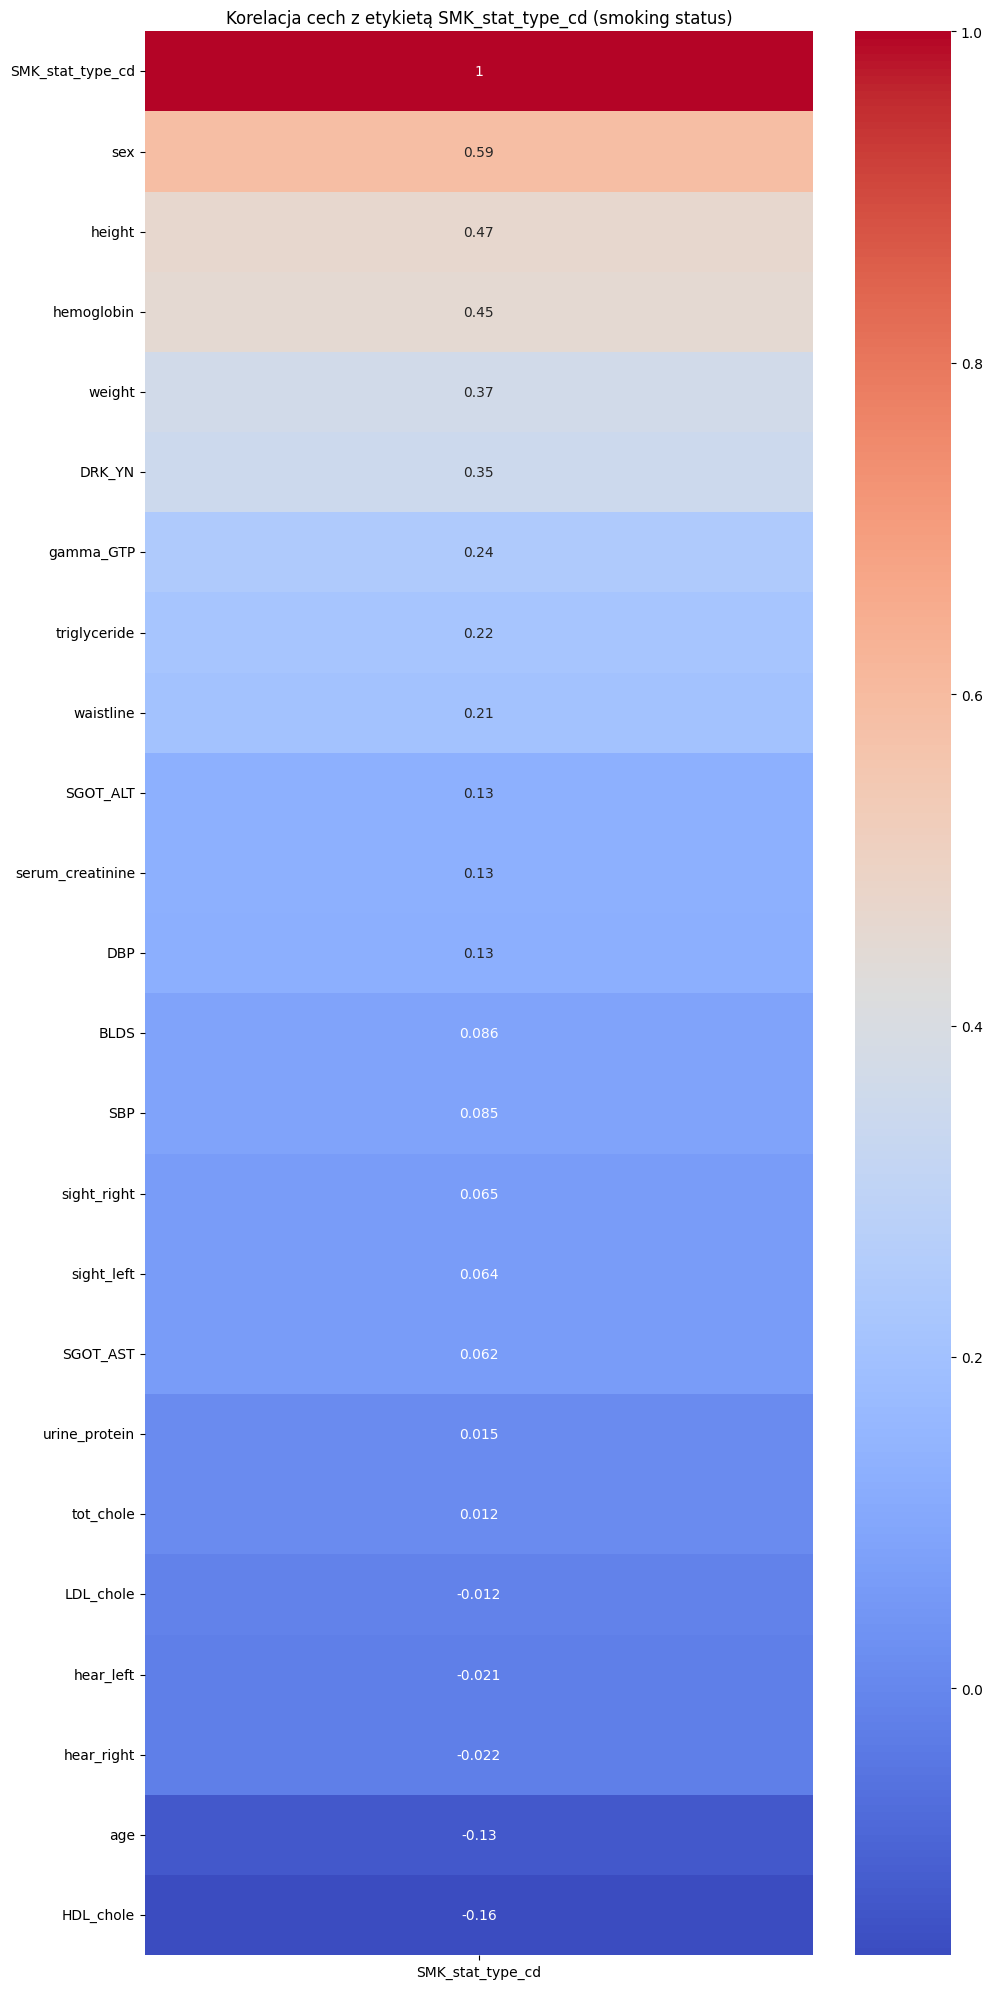

(SMK_stat_type_cd    1.000000
 sex                 0.591004
 height              0.467317
 hemoglobin          0.453385
 weight              0.366499
 DRK_YN              0.350784
 gamma_GTP           0.243576
 triglyceride        0.216026
 waistline           0.205485
 SGOT_ALT            0.131569
 serum_creatinine    0.129679
 DBP                 0.126849
 BLDS                0.086490
 SBP                 0.084918
 sight_right         0.065051
 sight_left          0.064194
 Name: SMK_stat_type_cd, dtype: float64,
 SGOT_ALT            0.131569
 serum_creatinine    0.129679
 DBP                 0.126849
 BLDS                0.086490
 SBP                 0.084918
 sight_right         0.065051
 sight_left          0.064194
 SGOT_AST            0.062437
 urine_protein       0.015263
 tot_chole           0.011833
 LDL_chole          -0.012315
 hear_left          -0.021245
 hear_right         -0.022330
 age                -0.126031
 HDL_chole          -0.161031
 Name: SMK_stat_type_cd, dtyp

In [ ]:

df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].astype(float)


num_cols = df.select_dtypes(include=['number']).columns


correlation_matrix = df[num_cols].corr()
smoke_correlation = correlation_matrix['SMK_stat_type_cd'].sort_values(ascending=False)


top_positive_corr_smk = smoke_correlation.head(16)  
top_negative_corr_smk = smoke_correlation.tail(15)


plt.figure(figsize=(10, 20))
sns.heatmap(smoke_correlation.to_frame(), cmap='coolwarm', annot=True, cbar=True)
plt.title("Korelacja cech z etykietą SMK_stat_type_cd (smoking status)")
plt.tight_layout()
plt.show()

top_positive_corr_smk, top_negative_corr_smk

In [44]:
print(df.columns.tolist())

['sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN']


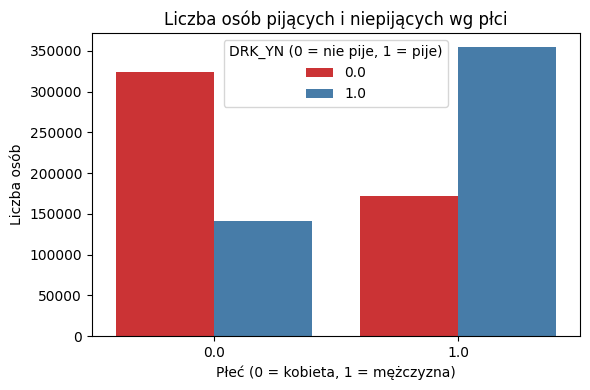

In [46]:


plt.figure(figsize=(6, 4))
ax = sns.countplot(x='sex', hue='DRK_YN', data=df, palette='Set1')
plt.title("Liczba osób pijących i niepijących wg płci")
plt.xlabel("Płeć (0 = kobieta, 1 = mężczyzna)")
plt.ylabel("Liczba osób")
plt.legend(title="DRK_YN (0 = nie pije, 1 = pije)")
plt.tight_layout()
plt.show()

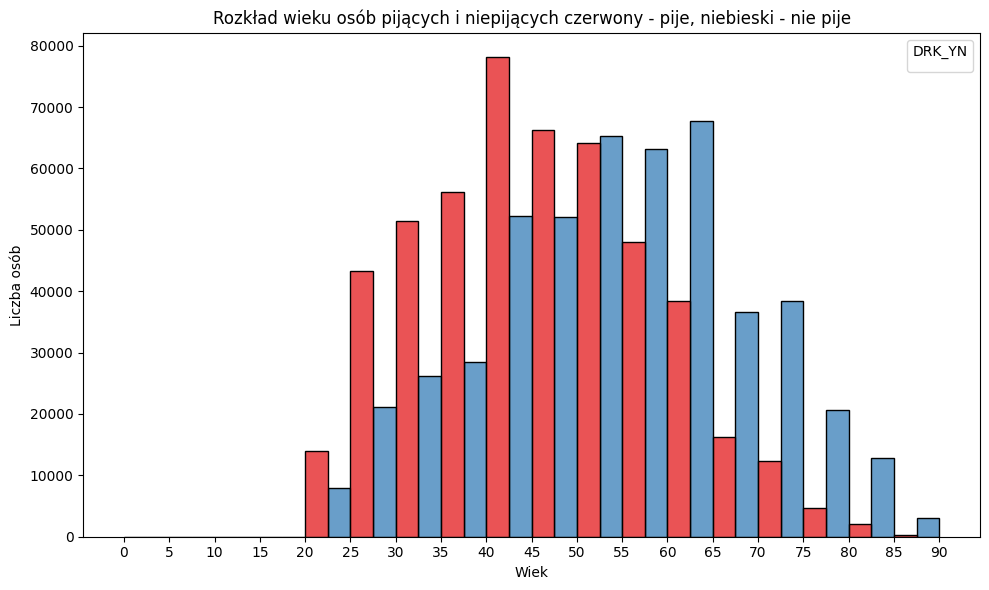

In [ ]:


plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=df[(df['age'] >= 0) & (df['age'] <= 90)],
    x='age',
    hue='DRK_YN',
    multiple='dodge',
    bins=range(0, 95, 5),  
    palette='Set1',
    edgecolor='black'
)
plt.title("Rozkład wieku osób pijących i niepijących czerwony - pije, niebieski - nie pije")
plt.xlabel("Wiek")
plt.ylabel("Liczba osób")

handles, labels = ax.get_legend_handles_labels()
custom_labels = ['Nie pije (0) - czerwony', 'Pije (1) - niebieski']
ax.legend(handles, custom_labels, title="DRK_YN")
plt.xticks(ticks=range(0, 95, 5))  
plt.tight_layout()
plt.show()

/var/folders/rc/ls7fy_xn7bj_z46fzrtflfvw0000gn/T/ipykernel_1482/2701291482.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


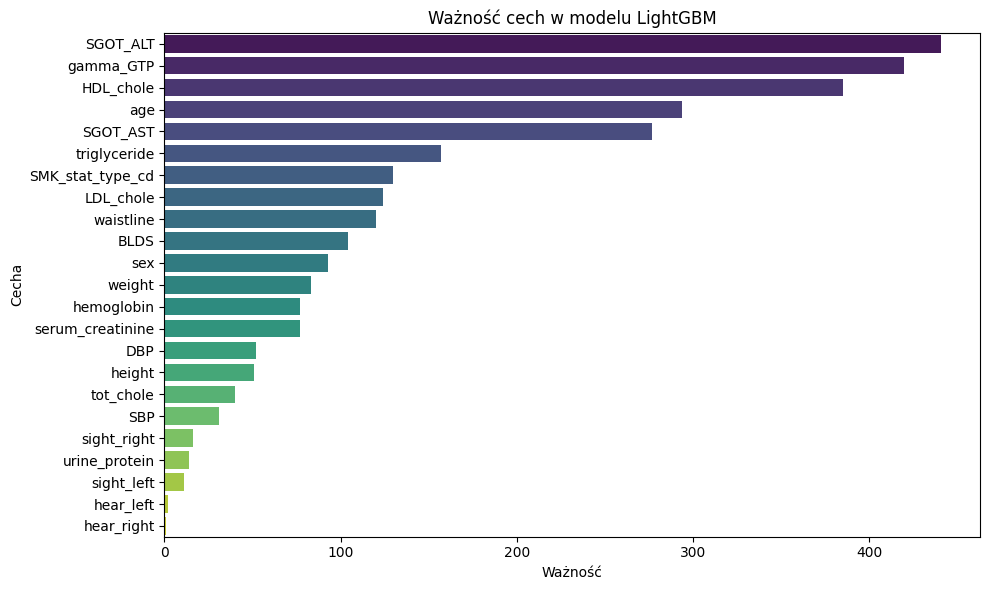

In [ ]:


importances = lgbm.feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("Ważność cech w modelu LightGBM")
plt.xlabel("Ważność")
plt.ylabel("Cecha")
plt.tight_layout()
plt.show()